In [ ]:
## HP tuning in neural networks.
## Basic tuning.

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.8.2


In [ ]:
# import keras

In [3]:
## MNIST dataset.
## Keras has MNIST dataset included.
## MNIST is  handwritten digits dataset

mnist=tf.keras.datasets.mnist
print("MNIST dataset loaded")

MNIST dataset loaded


In [4]:
##if you want to see how these images look
import matplotlib.pyplot as plt

In [5]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

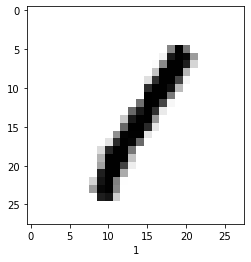

In [8]:
plt.imshow(mnist.load_data()[0][0][23], cmap='binary')
plt.xlabel(mnist.load_data()[0][1][23])
plt.show()

In [15]:
## our aim is to tune HP.
## we need to make a NN model.

def tune_mnist(num_train_imgs, num_hidden_units, dropout, learning_rate, momentum, epochs, batch_size):
  num_test_imgs = int(num_train_imgs/10)
  (xtrain, ytrain),(xtest, ytest)=mnist.load_data()
  xtrain=xtrain[:num_train_imgs]
  xtest=xtest[:num_test_imgs]
  ytrain=ytrain[:num_train_imgs]
  ytest=ytest[:num_test_imgs]

  ## let;s build NN.
  model = tf.keras.models.Sequential(
      [tf.keras.layers.Flatten(input_shape=xtrain[0].shape),
       tf.keras.layers.Dense(num_hidden_units, activation=tf.nn.relu ),
       tf.keras.layers.Dropout(dropout),
       tf.keras.layers.Dense(10, activation=tf.nn.softmax)
       ]
  )

  optmizer=tf.keras.optimizers.SGD(learning_rate=learning_rate,
                                   momentum=momentum)
  model.compile(metrics=['accuracy'])
  model.fit(xtrain, ytrain, epochs=epochs,batch_size=batch_size)

  test_loss, test_acc = model.evaluate(xtest, ytest, verbose=2 )
  print("test accuracy: ", test_acc)
  



In [17]:
## define search space
## HP search space

space={"num_train_imgs":[100,200], "num_hidden_units":[2,3,4], "dropout":[0.01,0.4], 
       "learning_rate":[0.001, 0.0024], "momentum":[0.2, 0.02], "epochs":[10, 20], "batch_size":[2,3,4]}

In [18]:
for m in space['num_train_imgs']:
  for n in space['num_hidden_units']:
    -----------------------------------------
    tune_mnist(num_train_imgs=m, num_hidden_units=n ,..................)

SyntaxError: ignored

In [ ]:
## 1)complete the code above.
## 2) use the same NN - GridSearchCV for HP tuning.
=================
##3) RandomSearchCV